In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
user = pd.read_csv("./Bank_Personal_Loan_Modelling-1.csv")

In [3]:
user.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Information on the Attributes/Column/Features:

### The attributes are divided and explained further down below:

- The ID feature is just a identification column of a customer and it does not carry any significance value to the data set or to the modelling, hence the ID column need not be considered during EDA or Modelling/Prediction.

#### We have five attributes that has binary values:

- Securities Account - The column represents that if value is 1 the customer has a Securities Account, else if the value is 0 the customer does not hold a Securities Account.
- CD Account - The column represents that if value is 1 the customer has a CD Account, else if the value is 0 the customer does not hold a CD Account.
- Online - The column represents that if value is 1 the customer has a Internet Banking enabled, else if the value is 0 the customer does not hold use Internet Banking.
- CreditCard - The column represents that if value is 1 the customer uses CreditCard Issued by UniversalBank, else if the value is 0 the customer does not use a CreditCard.
- Personal Loan - The column represents that if value is 1 the customer accepted the Personal Loan on the last campaign, else if the value is 0 the customer did not opt for Personal Loan on the last campaign. **This is the TARGET VARIABLE.**

#### We have five attributes that has interval values:

- Age - Informs about the age of the customer.
- Income - Informs about the Annual income of the customer in Dollars.
- Experience - Year of Experience.
- CCAvg - Informs about the average CrediCard spending in Dollars.
- Mortgage - Informs about the value of House Mortgage if any.

#### We have two attributes that has ordinal values:

- Education - Represents the education level of the customer. 1: Undergraduate; 2: Graduate; 3: Advanced/Professional
- Family - No. of members in the family/ Family Size of the customer

#### We have two attributes that has nominal values:

- ID - Customer ID maintained by the Bank
- ZIP Code - ZipCode of the Customer

In [4]:
user.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


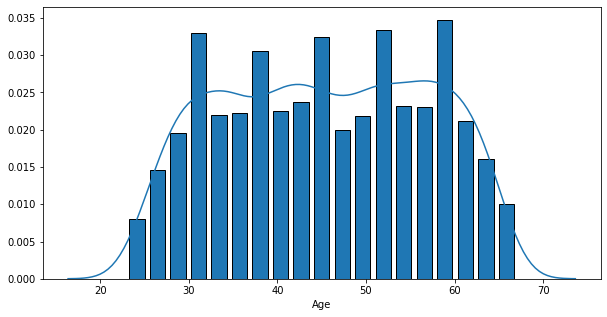

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(user['Age'], hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

### Findings on Age Attribute:

- We see early 30's, late 30's, mid 40's, early 50's and late 50's are high in number.
- The is no left or right skew and hence there are no outliers.
- Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. 
- We can confirm this by looking at the describe statement above, which shows mean is almost equal to median


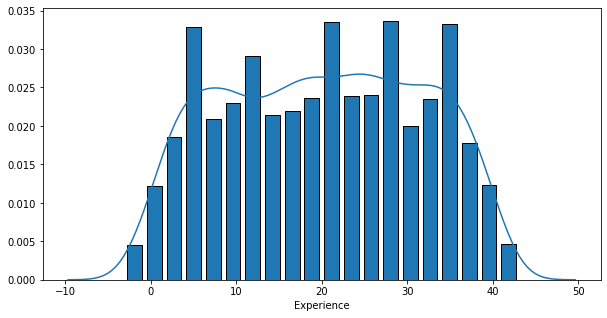

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(user['Experience'], hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

### Findings on Experience Attribute:

- There are few records with negative years of experience, experience can never be on the negative side.
- Experience attribute is not a clear representation of the universe.
- We need to understand why these errors occured, if its human error we can address it by taking the mean experience grouped by age and then imputing that corresponding values to the negative values.
- This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
- Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. 

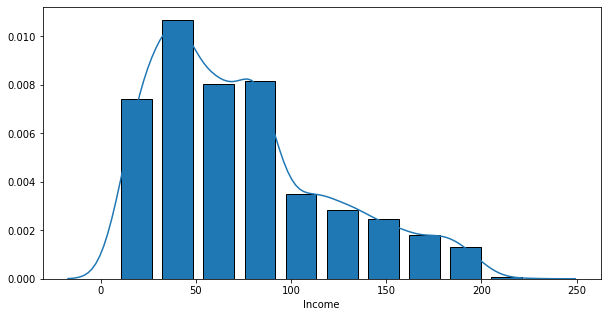

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(user['Income'], hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0}, bins=10)

#### Findings on Income Attribute:

- The distribution of income column is skewed to the right, there are possibilities that there outliers in the Income attribute.
- Customer who are earing between 40K - 50K Dollars are more in number.
- Demographic information obtained by the bank doesn't have a wide range of customers in all the segments of income.
- Outliers are found in this distribution.
- This attribute is also not a bell curve.
- Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

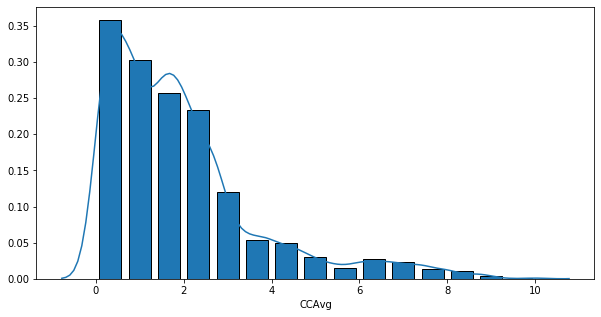

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(user['CCAvg'], hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0}, bins=15)

<Figure size 720x360 with 0 Axes>

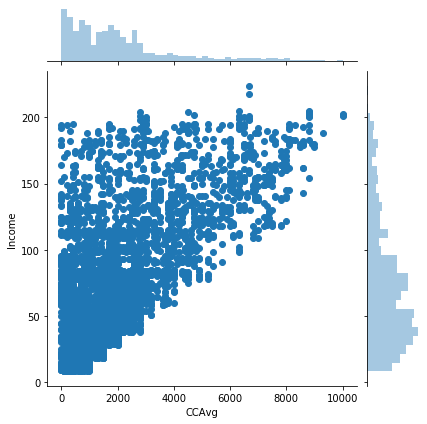

In [9]:
plt.figure(figsize=(10,5))
sns.jointplot(x=(user['CCAvg']*1000), y=user['Income'])

#### Findings on Credit Card Expenditure Average Attribute:

- From the distplot the distribution is not bell curve.
- Plotting the CCAvg spend against the Income data we find that the customers spending less have a very high average spend on CC.
- As the incomes is increasing the CCAVG spend is also linearly decreasing.
- We already seen skewness in income data, since income and CCAvg spend are correlated we can see right skewness in CCAvg spend also.
- We can also assume that there might be Outliars in the CCAvg Spend data.
- Average spending is between 0K to 10K and majority spends less than 2.5K

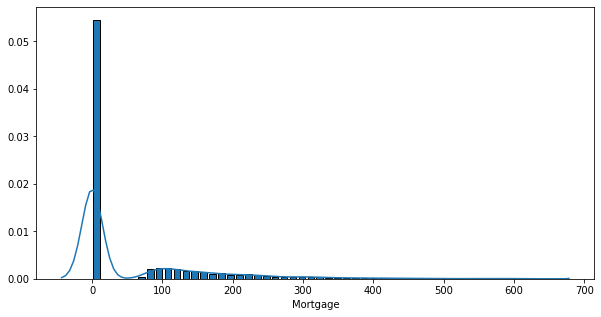

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(user['Mortgage'], hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

#### Findings on Mortgage Attribute:

- The Mortgage data is right skewed.
- Mortgage got on home is high for the value between 0K - 30K
- Due to skewness we can assume that there are outliars in the data.
- Mortgage is slowly decreasing and getting skewed to the right.

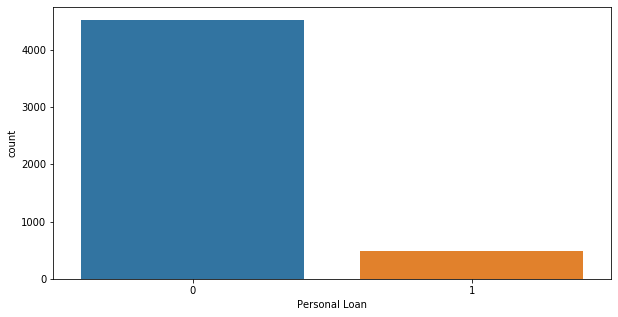

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(user['Personal Loan'])

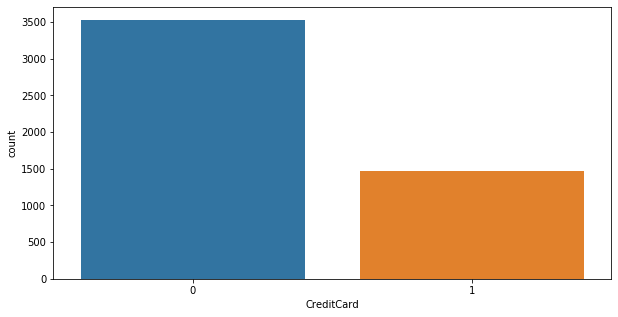

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(user['CreditCard'])

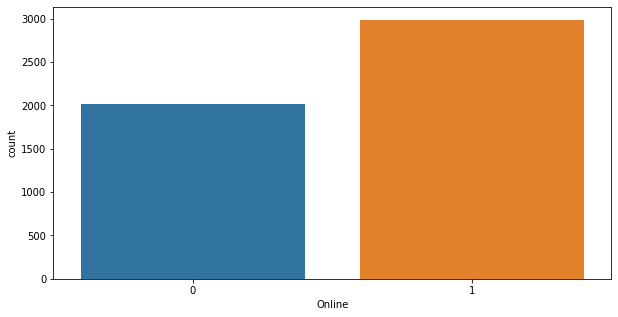

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(user['Online'])

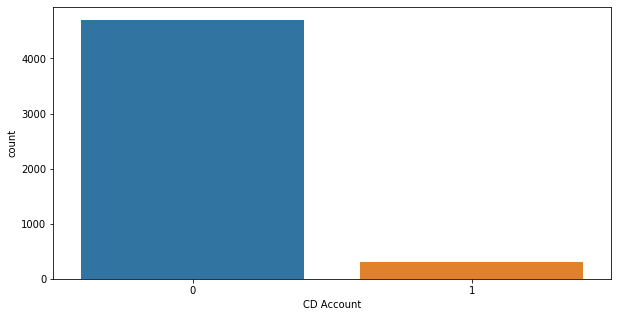

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(user['CD Account'])

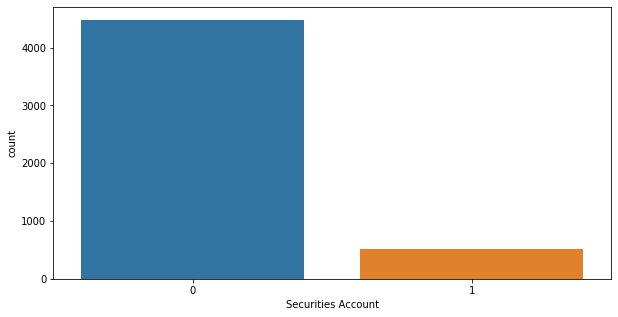

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(user['Securities Account'])

- The variables family and education are ordinal variables. The distribution of families is evenly distributes

### 3. Target Column : Personal Loan

- Personal Loan Column has Catagorical Data.
- Categorical data are not from a normal distribution. The normal distribution only makes sense if you're dealing with at least interval data, and the normal distribution is continuous and on the whole real line.

In [16]:
user.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- No column has null value.

In [17]:
# Finding Unique Data in each column
user.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


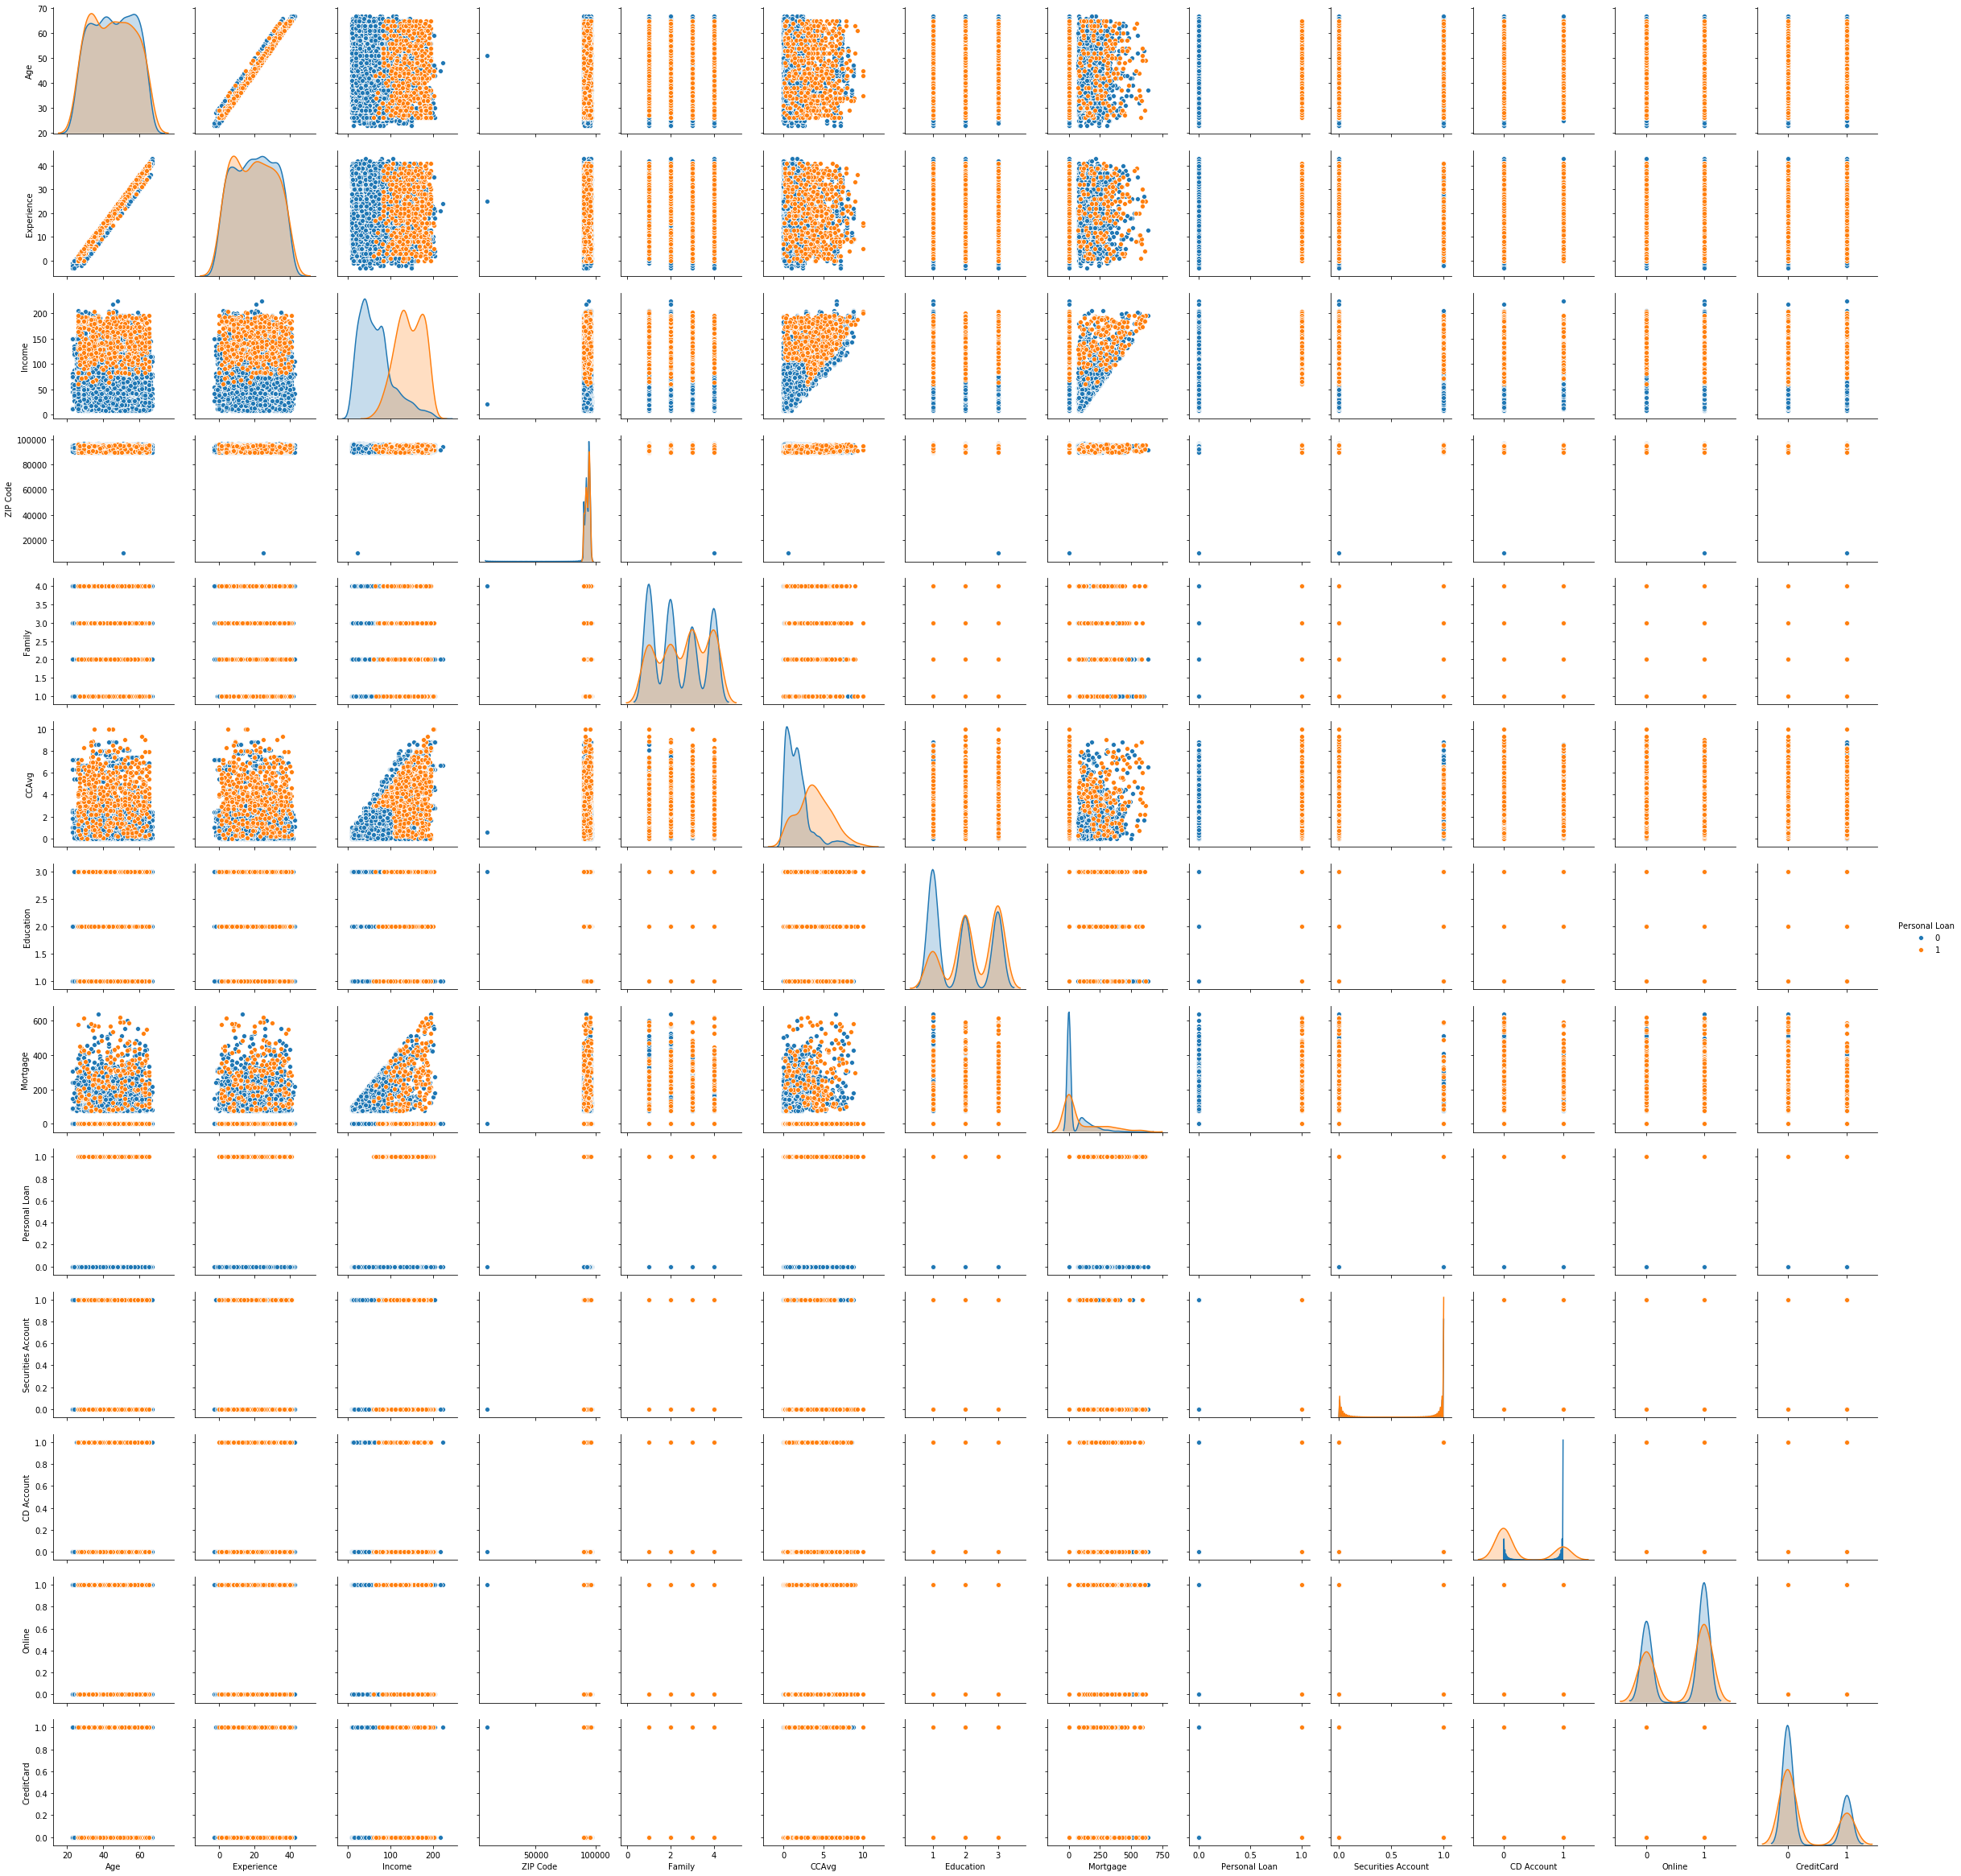

In [18]:
sns.pairplot(user.iloc[:,1:], hue='Personal Loan')

In [19]:
user[user['Experience'] < 0]['Experience'].count()

52

- There are 52 records with negative experience before we can proceed futher this has to be addressed, since experience cannot be in negative scale.

In [20]:
PosEx = user[user['Experience'] >0]
negEx = user['Experience'] < 0
column_name = 'Experience'
mylist = user.loc[negEx]['ID'].tolist()

In [21]:
PosEx.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [22]:
# There are 52 records with negative experience
negEx.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [23]:
for id in mylist:
    age = user.loc[np.where(user['ID']==id)]["Age"].tolist()[0] #age of the negtive exp record
    education = user.loc[np.where(user['ID']==id)]["Education"].tolist()[0] #education of the negative exp record
    df_filtered = PosEx[(PosEx['Age'] == age) & (PosEx['Education'] == education)] 
    exp = df_filtered['Experience'].median()
    user.loc[user.loc[np.where(user['ID']==id)].index, 'Experience'] = exp

In [24]:
# checking if there are records with negative experience
user[user['Experience'] < 0]['Experience'].count()

0

In [25]:
user.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [27]:
#train_set, test_set = train_test_split(user.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)
X = user.drop(['ID','Experience','Personal Loan'], axis=1)
Y = user['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

### Naïve Bayes Model

In [28]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

naive_model.score(X_test,y_test)

0.8866666666666667

In [29]:
navie_prediction = naive_model.predict(X_test)

### Logistic Regression (Classification)

In [30]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

logistic_prediction = clf.predict(X_test)
clf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8993333333333333

### k-Nearest Neighbors (KNN) Model

In [31]:
ac_score = []
knnscore = []

for k in range(1,21,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    knn_predict =  KNN.predict(X_test)
    acscore = accuracy_score(y_test, knn_predict)
    ac_score.append((acscore,k))
    _knnscore = KNN.score(X_test, y_test)
    knnscore.append((_knnscore,k))
    print("When K is : {}, accuracy using KNN.Score : {} and accuracy using accuracy_score : {}."
          .format(k, _knnscore, acscore))
    
maxacc = max(ac_score)
maxknnscore = max(knnscore)

When K is : 1, accuracy using KNN.Score : 0.8646666666666667 and accuracy using accuracy_score : 0.8646666666666667.
When K is : 3, accuracy using KNN.Score : 0.888 and accuracy using accuracy_score : 0.888.
When K is : 5, accuracy using KNN.Score : 0.8926666666666667 and accuracy using accuracy_score : 0.8926666666666667.
When K is : 7, accuracy using KNN.Score : 0.8906666666666667 and accuracy using accuracy_score : 0.8906666666666667.
When K is : 9, accuracy using KNN.Score : 0.8913333333333333 and accuracy using accuracy_score : 0.8913333333333333.
When K is : 11, accuracy using KNN.Score : 0.8933333333333333 and accuracy using accuracy_score : 0.8933333333333333.
When K is : 13, accuracy using KNN.Score : 0.892 and accuracy using accuracy_score : 0.892.
When K is : 15, accuracy using KNN.Score : 0.8933333333333333 and accuracy using accuracy_score : 0.8933333333333333.
When K is : 17, accuracy using KNN.Score : 0.8926666666666667 and accuracy using accuracy_score : 0.8926666666666

In [32]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train, y_train)
knn_predict =  KNN.predict(X_test)
KNN.score(X_test, y_test)

0.8933333333333333

### Confusion Matrix for the above Models:

In [33]:
print("Confusion Matrix for Naïve Bayes Model: \n {}".format(metrics.confusion_matrix(y_test,navie_prediction)))

Confusion Matrix for Naïve Bayes Model: 
 [[1234  108]
 [  62   96]]


In [34]:
print("Confusion Matrix for Logistic Classifier Model: \n {}".format(metrics.confusion_matrix(y_test,logistic_prediction)))

Confusion Matrix for Logistic Classifier Model: 
 [[1308   34]
 [ 117   41]]


In [35]:
print("Confusion Matrix for K-Nearest Classifier Model: \n {}".format(metrics.confusion_matrix(y_test,knn_predict)))

Confusion Matrix for K-Nearest Classifier Model: 
 [[1330   12]
 [ 148   10]]
